<a href="https://colab.research.google.com/github/afif-af/ml_pytorch_scikitlearn/blob/main/Chapter03ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target

In [61]:
print('class labels:', np.unique(y))

class labels: [0 1 2]


In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                               random_state=1, stratify=y)

In [63]:
print('Labels counts in y:',np.bincount(y))
print('Labels counts in y_train:',np.bincount(y_train))
print('Labels counts in y_test:',np.bincount(y_test)
)

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [65]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [66]:
y_pred=ppn.predict(x_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [67]:
from sklearn.metrics import accuracy_score
print('Accuracy : %.3f' % accuracy_score(y_test, y_pred))

Accuracy : 0.978


In [68]:
print('Accuracy: %3.f' % ppn.score( x_test_std,y_test))

Accuracy:   1


In [69]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [70]:
def plot_decision_regions(x, y, classifier, test_idx=None,
                          resolution=0.02):
  markers=('o','s','^','v','<')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = x[:,0].min() - 1 , x[:,0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
  lab=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab=lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y==cl, 0],
                y=x[y==cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'class {cl}',
                edgecolors='black')

    if test_idx:
      x_test, y_test=x[test_idx,:],y[test_idx]
      plt.scatter(x_test[:,0], x_test[:,1],
                  c='none', edgecolors='black', alpha=1.0,
                  linewidths=1, marker='o',
                  s=100,label='Test set')

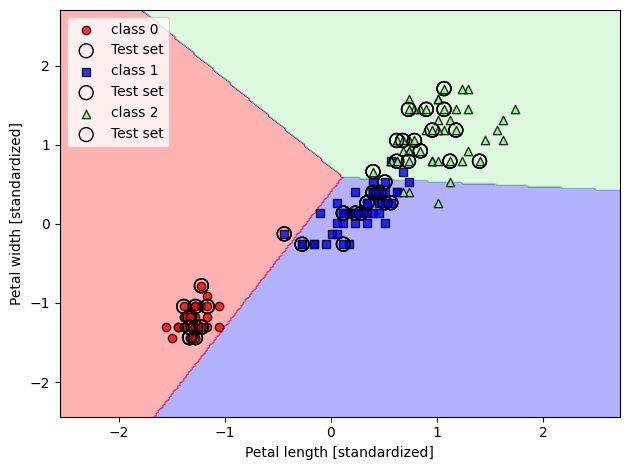

In [71]:
x_combined_std=np.vstack((x_train_std, x_test_std))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(x=x_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [72]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

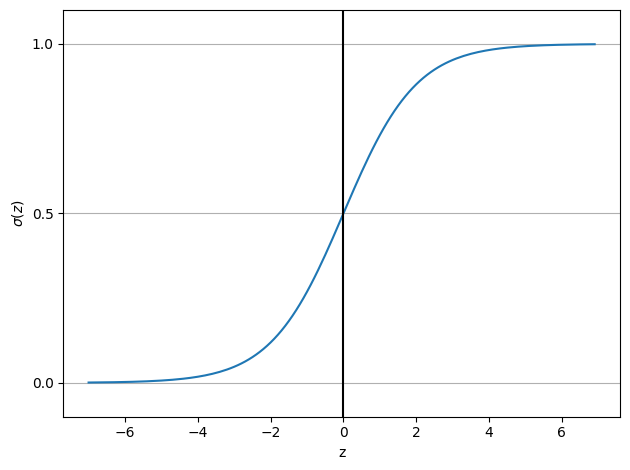

In [73]:
z=np.arange(-7,7,0.1)
sigma_z=sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca ()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

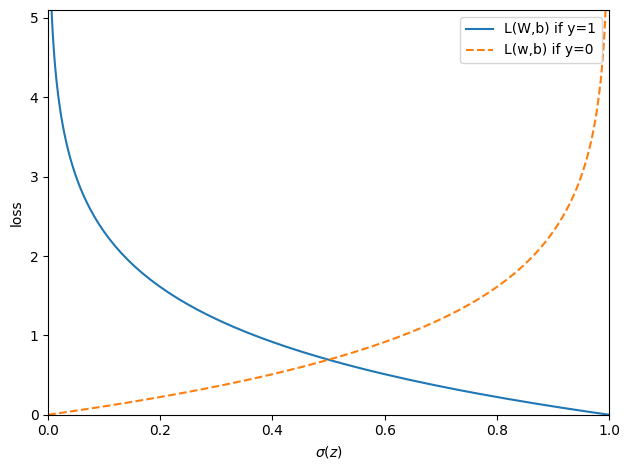

In [74]:
def loss_1(z):
  return - np.log(sigmoid(z))
def loss_0(z):
  return - np.log(1- sigmoid(z))
z=np.arange(-10, 10, 0.1)
sigma_z=sigmoid(z)
c1=[loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(W,b) if y=1')
c0=[loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--',label='L(w,b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [75]:
class LogisticRegressionGD:
  def __init__ (self, eta=0.01, n_iter=50, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state

  def fit(self, x, y):
    rgen=np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=x.shape[1])
    self.b_ = np.float64(0.)
    self.losses_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(x)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * x.T.dot(errors) / x.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      # Added protection against log(0)
      output = np.clip(output, 1e-15, 1 - 1e-15)
      loss = (-y.dot(np.log(output))
              -((1 - y).dot(np.log(1 - output))) / x.shape[0])
      self.losses_.append(loss)
    return self

  def net_input(self, x):
    return np.dot(x, self.w_) +self.b_

  def activation(self, x):
    return 1./(1. +np.exp(-np.clip(x, -250, 250)))

  def predict(self, x):
    return np.where(self.activation(self.net_input(x)) >= 0.5, 1, 0)

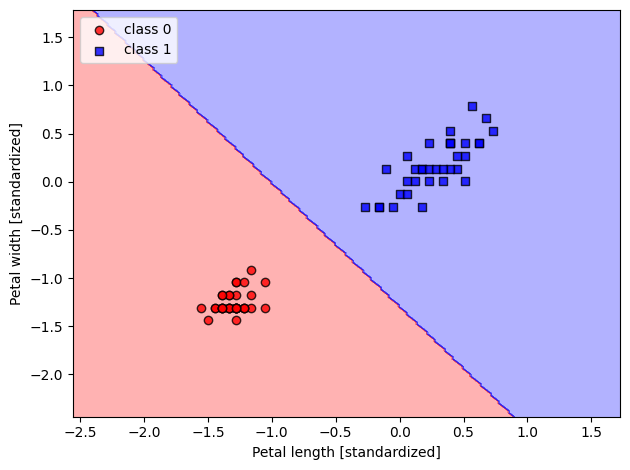

In [76]:
x_train_01_subset=x_train_std[(y_train==0) | (y_train==1)]
y_train_01_subset =y_train[(y_train==0)| (y_train==1)]
lrgd=LogisticRegressionGD(eta=0.3,
                          n_iter=1000,
                          random_state=1)
lrgd.fit(x_train_01_subset,
         y_train_01_subset)
plot_decision_regions(x=x_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


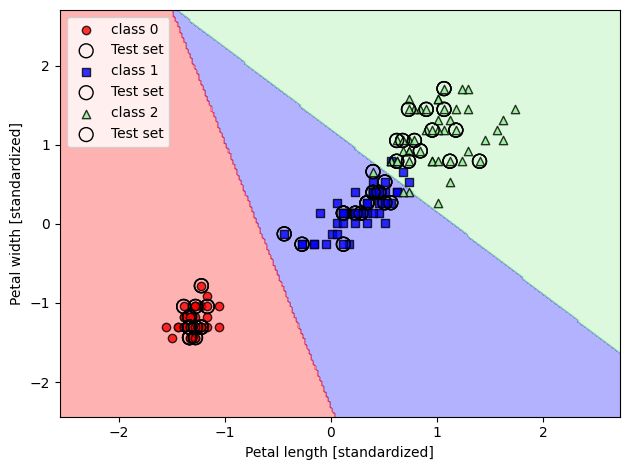

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [78]:
lr.predict_proba(x_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [79]:
lr.predict_proba(x_test_std[:3,:]).argmax(axis=1)


array([2, 0, 0])

In [80]:
lr.predict(x_test_std[:3, :])

array([2, 0, 0])

In [81]:
lr.predict(x_test_std[0, :].reshape(1,-1))

array([2])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

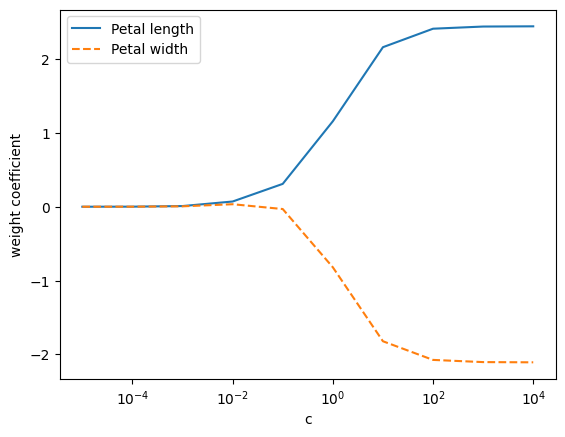

In [82]:
weights, params=[],[]
for c in np.arange(-5,5):
  lr=LogisticRegression(C=10.**c,
                        multi_class='ovr')
  lr.fit(x_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights =np.array(weights)
plt.plot(params, weights[:,0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('weight coefficient')
plt.xlabel('c')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

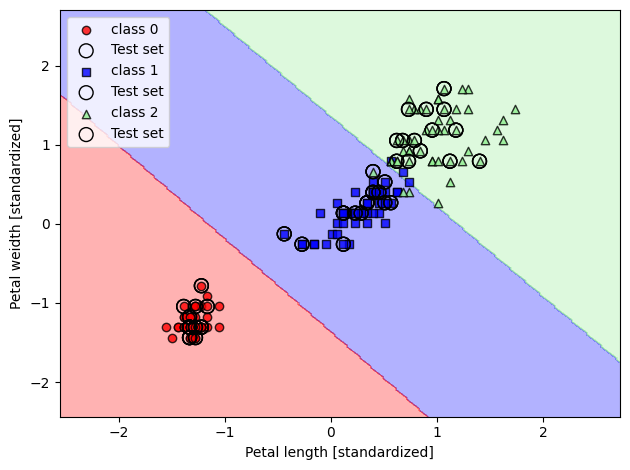

In [83]:
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=1.0,random_state=1)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal weidth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [84]:
from sklearn.linear_model import SGDClassifier
ppn=SGDClassifier(loss='prerceptron')
lr=SGDClassifier(loss='log')
svm=SGDClassifier(loss='hinge')

In [85]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
x_xor=np.random.randn(200, 2)

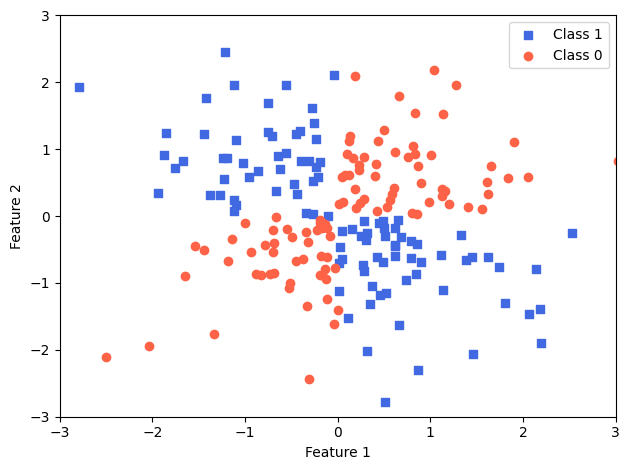

In [86]:
y_xor=np.logical_xor(x_xor[:,0]>0,
                     x_xor[:,1]>0)
y_xor=np.where(y_xor, 1,0)
plt.scatter(x_xor[y_xor == 1,0],
            x_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')

plt.scatter(x_xor[y_xor ==0,0],
            x_xor[y_xor ==0,1],
            c="tomato", marker='o',
            label='Class 0')
plt.xlim([-3,3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

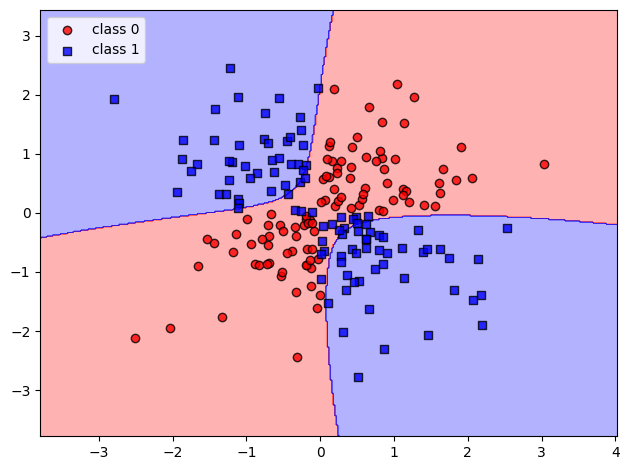

In [87]:
svm=SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

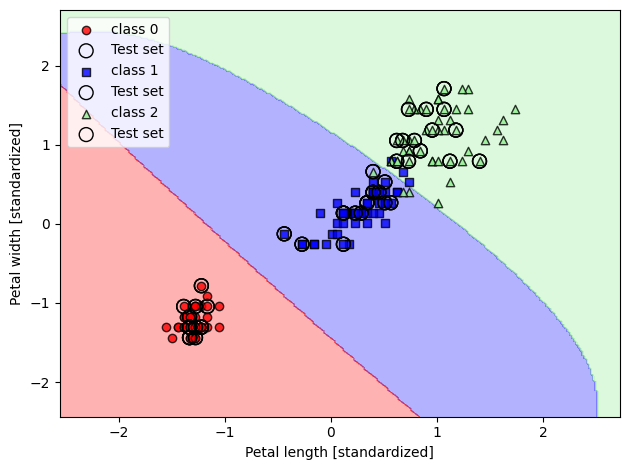

In [88]:
svm=SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

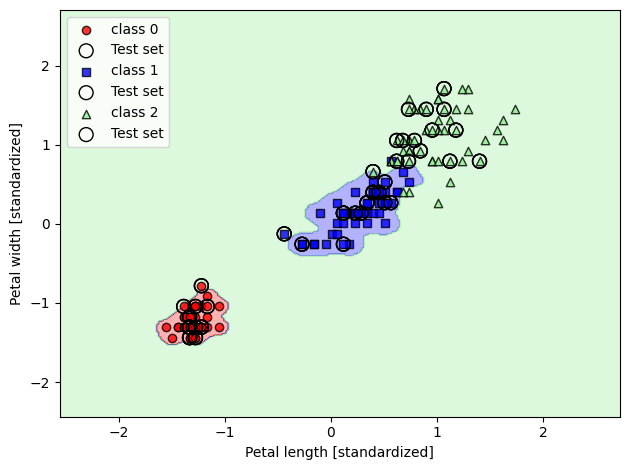

In [89]:
svm=SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

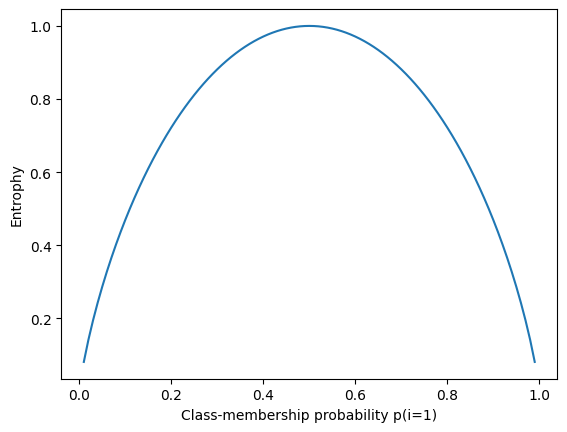

In [90]:
def entropy(p):
  return -p * np.log2(p) -(1-p)* np.log2((1-p))
x=np.arange(0.0, 1.0, 0.01)
ent=[entropy(p) if p!=0 else None for p in x]
plt.ylabel('Entrophy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

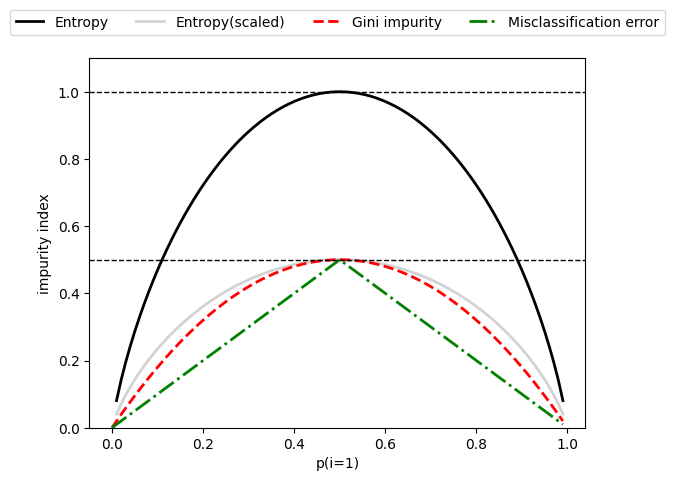

In [93]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
  return p*(1-p) +(1-p)*(1-(1-p))
def entropy(p):
  return - p *np.log2(p) - (1-p) *np.log2((1-p))
def error(p):
  return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p !=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent,gini(x), err],
                         ['Entropy', 'Entropy(scaled)',
                          'Gini impurity',
                          'Misclassification error'],
                         ['-','-','--','-.'],
                         ['black', 'lightgray','red','green','cyan']):
  line=ax.plot(x, i, label=lab,
               linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel("impurity index")
plt.show()

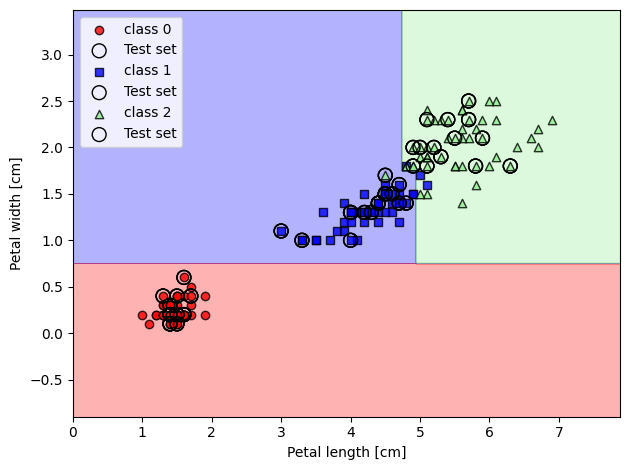

In [96]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion='gini',
                                  max_depth=4,
                                  random_state=1)
tree_model.fit(x_train, y_train)
x_combined=np.vstack((x_train, x_test))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(x_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

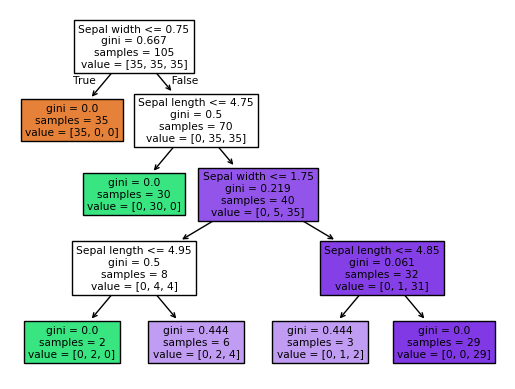

In [100]:
from sklearn import tree
feature_names=['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

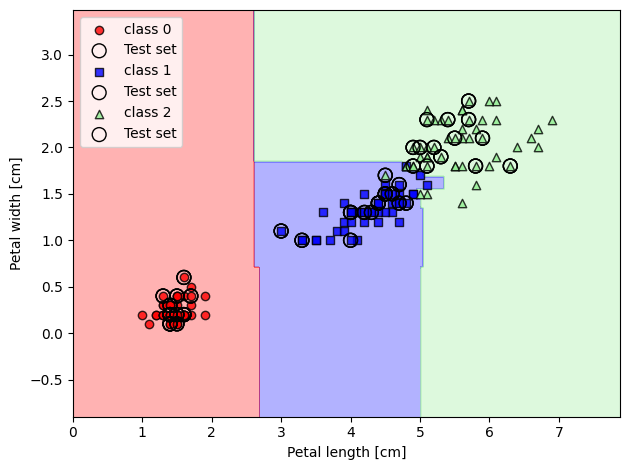

In [108]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=25,
                             random_state=1,
                             n_jobs=2)
forest.fit(x_train, y_train)
plot_decision_regions(x_combined,
                      y_combined,
                      classifier=forest,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

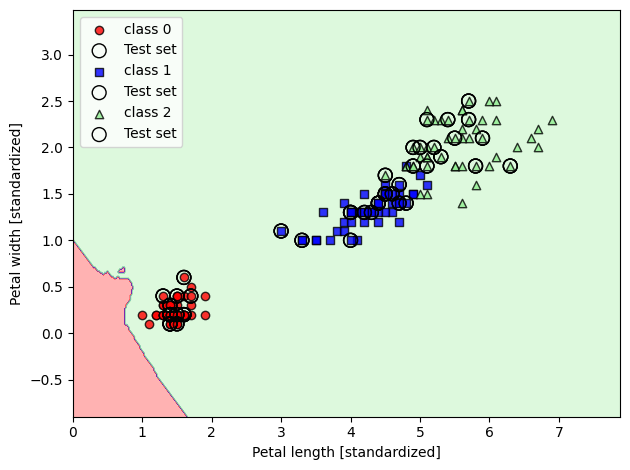

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,
                         p=2, metric='minkowski')
knn.fit(x_train_std, y_train)
plot_decision_regions(x_combined,y_combined,
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
